In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [4]:
Flight_data = pd.read_csv('Opinion Mining Data.csv')
Flight_data 

,Reviewer Name,Review Date,Review Text
0,Luc D.,2025-04-01,Flight of the 26th of October from Delhi to Pa...
1,Neeraj S,2025-01-04,(UK955/08Nov25/PNR : NLAYRX / seat 14B) Left a...
2,Tapani U,2025-01-10,What a fantastic flight! Chennai (Madras) - Ne...
3,Tour10949987829,2025-01-06,I never travel in this airline. Mumbai - New D...
4,Sneha Kumar,2025-01-25,In-flight meal was better than expected. Good ...
...,...,...,...
288,Harsh Vardhan,2015-11-12,I flew Guwahati to Delhi return with Vistara i...
289,Yashasvi Makwana,2015-10-21,It was my first trip with Vistara. I had 9 kg ...
290,Sameer Phatak,2015-10-12,Mumbai to Delhi with Vistara. My check in proc...
291,Shivam Negi,2015-09-26,My third Vistara flight and using Premium Econ...


In [5]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)  
    return text.translate(translator)

In [6]:
en_stops = set(stopwords.words('english'))


In [7]:
all_reviews = " ".join(Flight_data['Review Text'].astype(str))  
cleaned_reviews = remove_punctuation(all_reviews) 

In [8]:
nltk_tokens = nltk.word_tokenize(cleaned_reviews)

In [9]:
cleaned_words = [word for word in nltk_tokens if word.lower() not in en_stops]
print("Words after removing stopwords:", cleaned_words)

Words after removing stopwords: ['Flight', '26th', 'October', 'Delhi', 'Paris', 'Good', 'flight', 'Good', 'service', 'terrible', 'hygiene', 'disposible', 'coffee', 'cup', 'found', 'worm', 'attached', 'side', 'drunk', 'Result', '5', 'months', 'doctor', 'visits', 'flight', 'number', 'UK21', 'sat', 'seat', '11E', 'tail', 'plane', 'anyone', 'wants', 'sack', 'hostess', 'please', 'UK95508Nov25PNR', 'NLAYRX', 'seat', '14B', 'Left', 'item', 'personal', 'importance', 'front', 'seat', 'pouch', 'succeed', 'getting', 'back', 'thing', 'despite', 'options', 'options', 'place', 'request', 'ground', 'crew', 'terminal', 'staff', 'telecustomer', 'care', 'Learnt', 'lesson', 'trust', 'seems', 'like', 'simple', 'request', 'support', 'followed', 'one', 'disembarked', 'plane', 'fantastic', 'flight', 'Chennai', 'Madras', 'New', 'Delhi', 'Simply', 'fantastic', 'time', 'performance', 'superb', 'crews', 'tasty', 'hot', 'meal', 'Taj', 'Sats', 'plus', 'flight', 'AI2836', 'landed', 'ahead', 'schedule', 'DEL', 'desp

In [10]:
ps = PorterStemmer()
stemmed_words = [ps.stem(word) for word in cleaned_words]
print("Words after stemming:", stemmed_words)

Words after stemming: ['flight', '26th', 'octob', 'delhi', 'pari', 'good', 'flight', 'good', 'servic', 'terribl', 'hygien', 'dispos', 'coffe', 'cup', 'found', 'worm', 'attach', 'side', 'drunk', 'result', '5', 'month', 'doctor', 'visit', 'flight', 'number', 'uk21', 'sat', 'seat', '11e', 'tail', 'plane', 'anyon', 'want', 'sack', 'hostess', 'pleas', 'uk95508nov25pnr', 'nlayrx', 'seat', '14b', 'left', 'item', 'person', 'import', 'front', 'seat', 'pouch', 'succeed', 'get', 'back', 'thing', 'despit', 'option', 'option', 'place', 'request', 'ground', 'crew', 'termin', 'staff', 'telecustom', 'care', 'learnt', 'lesson', 'trust', 'seem', 'like', 'simpl', 'request', 'support', 'follow', 'one', 'disembark', 'plane', 'fantast', 'flight', 'chennai', 'madra', 'new', 'delhi', 'simpli', 'fantast', 'time', 'perform', 'superb', 'crew', 'tasti', 'hot', 'meal', 'taj', 'sat', 'plu', 'flight', 'ai2836', 'land', 'ahead', 'schedul', 'del', 'despit', 'challeng', 'weather', 'condit', 'bag', 'belt', 'soon', 'reac

In [11]:
cleaned_text_for_wordcloud = " ".join(stemmed_words)

In [12]:
wordcloud = WordCloud(width=500, height=500, random_state=1, background_color='white', min_font_size=10).generate(cleaned_text_for_wordcloud)

In [13]:
def plot_speech(wordcloud):
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

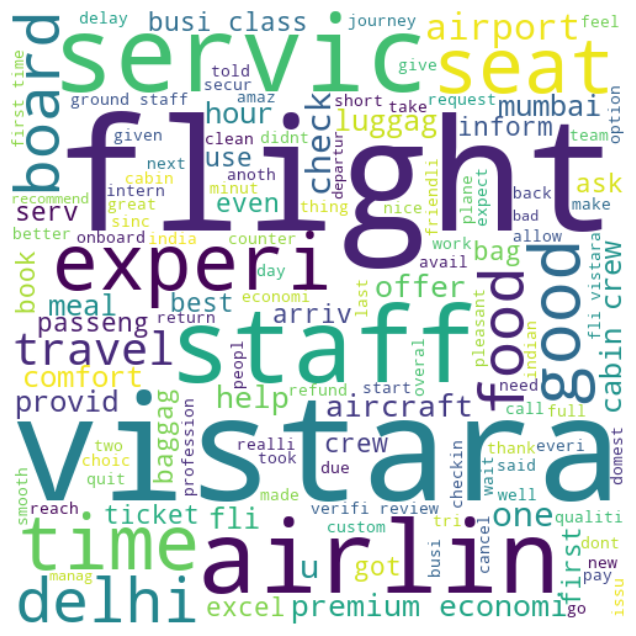

In [14]:
plot_speech(wordcloud)